In [1870]:
import numpy as np
import pandas as pd
import os
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


import os
import datetime
from zoneinfo import ZoneInfo
import pandas as pd
import numpy as np
import PIL
#import ffmpeg
from PIL import Image
from PIL import ImageOps
# from PIL import Resampling
from matplotlib import cm

In [1871]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is F8D6-0D86

 Directory of C:\Users\Jkb83\Work Folders\Desktop\pressure_mat_camera

03/10/2024  15:18    <DIR>          .
03/10/2024  15:18    <DIR>          ..
15/05/2024  11:31                66 .gitattributes
13/09/2024  12:01             3,269 .gitignore
26/09/2024  12:39    <DIR>          .ipynb_checkpoints
01/10/2024  11:54    <DIR>          data
26/09/2024  08:21           451,142 decision-tree-classifer.ipynb
03/10/2024  15:18            76,751 find_blank_mat_frames.ipynb
16/09/2024  09:08            68,365 find_odd.ipynb
26/09/2024  12:40            15,397 Jonathan_test_26-9.ipynb
15/05/2024  11:31             1,092 LICENSE
15/05/2024  14:21             2,864 make_directories.ipynb
12/06/2024  13:57           788,443 Marion_Fall12.csv
13/09/2024  12:01           393,898 mat_camera_align.ipynb
26/09/2024  08:24           347,305 mat_camera_merge.ipynb
03/10/2024  15:15    <DIR>          MB_transformed_data_ADLs
02/10/2024  13:

In [1872]:
def mat_date_reader(d):
    try:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f%z')
    except ValueError:
        return datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S%z')

In [ ]:
Utility function to parse the datetime information in the mat data.

Read one particular data file.

In [1907]:
mframe = pd.read_csv('data/mat_data/Marion/ADL/Dataset MB1 11_06 PMADL/34/34.csv', 
                     converters={'Timestamp': mat_date_reader},
                    index_col='Frame')
mframe.dtypes

Timestamp           datetime64[ns, UTC+01:00]
Range Min (mmHg)                        int64
Range Max (mmHg)                        int64
0                                       int64
1                                       int64
                              ...            
1723                                    int64
1724                                    int64
1725                                    int64
1726                                    int64
1727                                    int64
Length: 1731, dtype: object

In [1908]:
mframe

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,2024-06-11 11:02:30.762000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-06-11 11:02:30.795000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-06-11 11:02:30.827000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-06-11 11:02:30.860000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-06-11 11:02:30.892000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2024-06-11 11:02:51.934000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,2024-06-11 11:02:51.966000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,2024-06-11 11:02:51.999000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1909]:
mframe_trimmed = mframe.drop(['Timestamp', 'Range Min (mmHg)', 'Range Max (mmHg)'], axis='columns')
mframe_trimmed


,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1910]:
mframe_trimmed.astype('bool').sum(axis='columns')

Frame
1      0
2      0
3      0
4      0
5      0
      ..
652    4
653    4
654    4
655    4
656    4
Length: 656, dtype: int64

<Axes: ylabel='Frequency'>

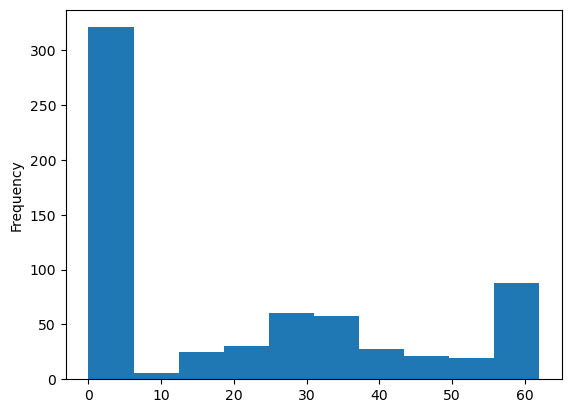

In [1911]:
mframe_trimmed.astype('bool').sum(axis='columns').plot.hist()

In [1912]:
mframe_trimmed.loc[150:170].astype('bool').sum(axis='columns')

Frame
150     0
151     0
152     0
153     0
154     0
155     0
156     0
157     0
158     0
159     0
160     0
161     4
162     6
163    11
164    11
165    12
166    13
167    13
168    13
169    13
170    12
dtype: int64

In [1913]:
PIXEL_VALUE_GREATER_THAN = 10

mframe_trimmed.astype('bool').sum(axis='columns') > PIXEL_VALUE_GREATER_THAN

Frame
1      False
2      False
3      False
4      False
5      False
       ...  
652    False
653    False
654    False
655    False
656    False
Length: 656, dtype: bool

In [1925]:
MINIMUM_PIXELS = 1
MAXIMUM_PIXELS = 63

at_least_some_pixels = mframe_trimmed.astype('bool').sum(axis='columns') > MINIMUM_PIXELS
not_too_many_pixels = mframe_trimmed.astype('bool').sum(axis='columns') < MAXIMUM_PIXELS
mframe_with_pixels = mframe[at_least_some_pixels & not_too_many_pixels]
mframe_with_pixels

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
161,2024-06-11 11:02:35.954000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,2024-06-11 11:02:35.986000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,2024-06-11 11:02:36.018000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,2024-06-11 11:02:36.051000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,2024-06-11 11:02:36.083000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2024-06-11 11:02:51.934000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,2024-06-11 11:02:51.966000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,2024-06-11 11:02:51.999000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1926]:
mn = mframe_with_pixels.index.min()
mx = mframe_with_pixels.index.max()
mn, mx

(161, 656)

In [1927]:
mn = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.min()
mx = mframe[mframe_trimmed.astype('bool').sum(axis='columns') > 5].index.max()
mn, mx

(162, 497)

In [1904]:
mframe.loc[mn:mx]

,Timestamp,Range Min (mmHg),Range Max (mmHg),0,1,2,3,4,5,6,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
Frame,,,,,,,,,,,,,,,,,,,,,
420,2024-06-11 10:15:04.154000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,2024-06-11 10:15:04.186000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,2024-06-11 10:15:04.219000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,2024-06-11 10:15:04.251000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,2024-06-11 10:15:04.283000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2024-06-11 10:15:09.727000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,2024-06-11 10:15:09.759000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594,2024-06-11 10:15:09.791000+01:00,0,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1846]:
mframe.loc[mn:mx].to_csv('MB_transformed_data_ADLs/PMADL33_mframe.csv')